# Prediction for SyriaTel Customer Churn

## Importing libraries

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report 



## Loading the dataset

In [138]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Dataset Information

In [139]:
# General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [140]:
#shape of our data
df.shape

(3333, 21)

In [141]:
# statistical description of numeric features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Exploratory Data Analysis(EDA)

This section prepares the data for visualisation and modelling

1. Checking for duplicate values

In [142]:
# Check for duplicates 
df.duplicated().sum()

0

There are no duplicates

2. Checking for missing values

In [143]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values

3. Dropping columns

In [144]:
#drop phone numbers 
#We will use state data for analysis rather than the area codes
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


I have dropped the phone number feature as it contains the customers personal information and will not be useful in this analysis

4. Checking unique values

In [145]:
# Check the number of unique values in all columns 
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

Creating a list of numeric and categorical data

In [146]:
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

### Analysis on 'churn' Feature
* Churn shows whether a client has ended their SyriaTel contract. False means they have an active account and have not terminated, whereas true shows they have.
* Churn will be used as the dependent variable in this analysis.


In [147]:
df["churn"].value_counts(normalize=True)


False    0.855086
True     0.144914
Name: churn, dtype: float64

False    2850
True      483
Name: churn, dtype: int64


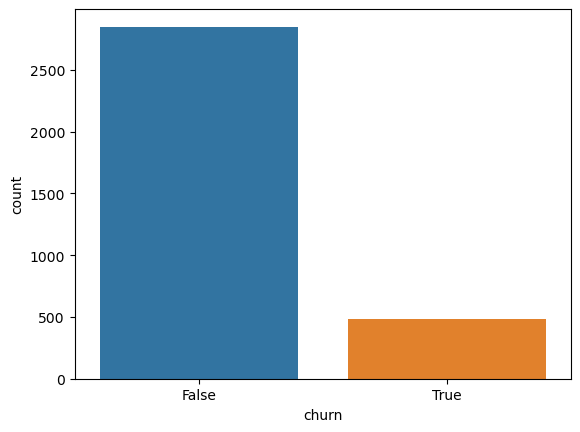

In [148]:
#visualizing the churn rate
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

* 483 of the 3,333 clients in the dataset have cancelled their SyriaTel contract. That represents a loss of 14.5% of clients. 
* An imbalance in the data can be seen in the binary class distribution. Prior to modelling, this needs to be fixed because an unbalanced feature can lead to inaccurate predictions from the model.


## Numeric Features Analysis

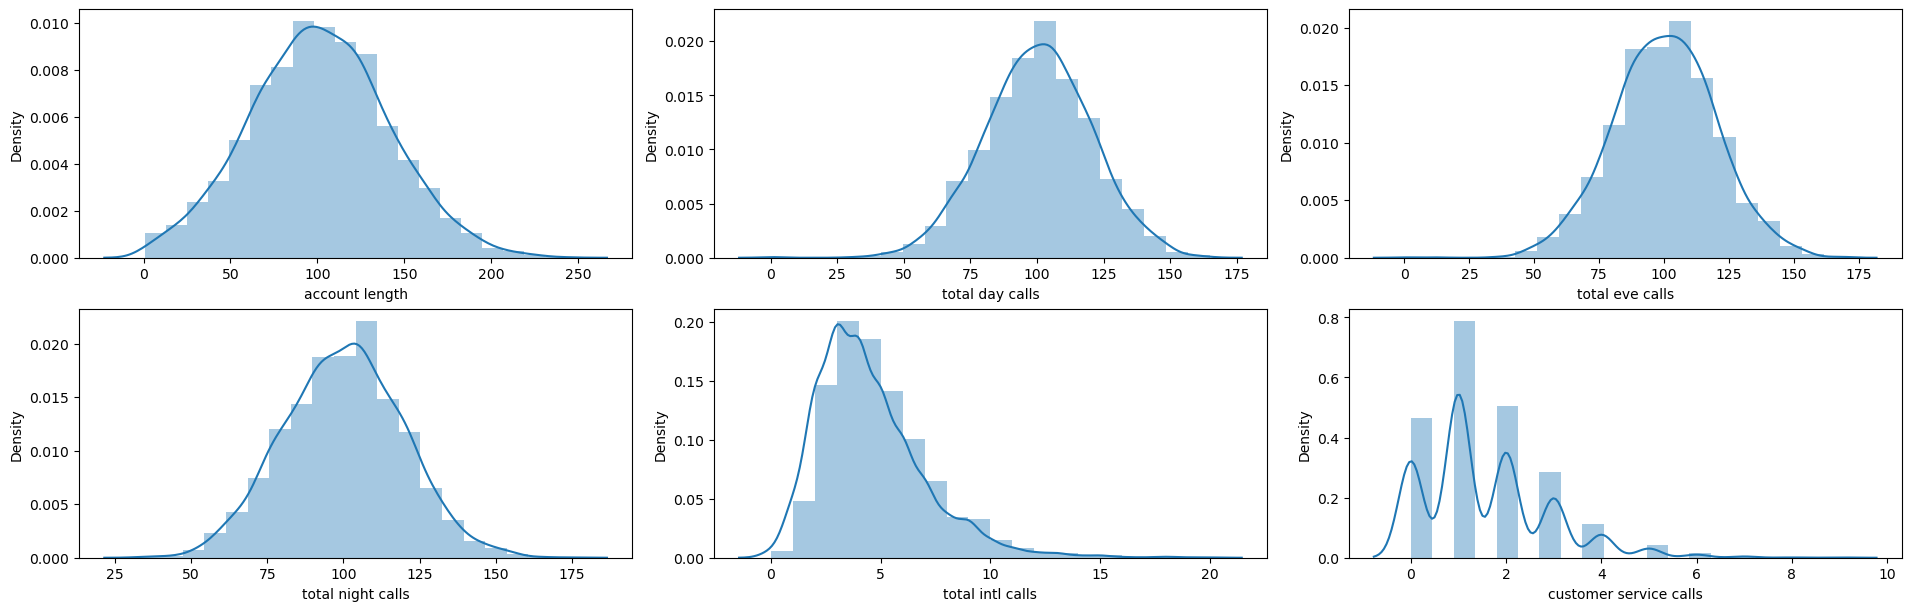

In [149]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

* All of the features in the distribution graphs above, with the exception of customer service calls, have a normal distribution.
* The overall distribution of foreign calls appears to be tilted to the right, notwithstanding this There are many peaks in customer service calls, suggesting that there are multiple population modes. This makes sense because phone calls to customer support must contain an integer, not a floating-point number. 

Distribution of customer service calls

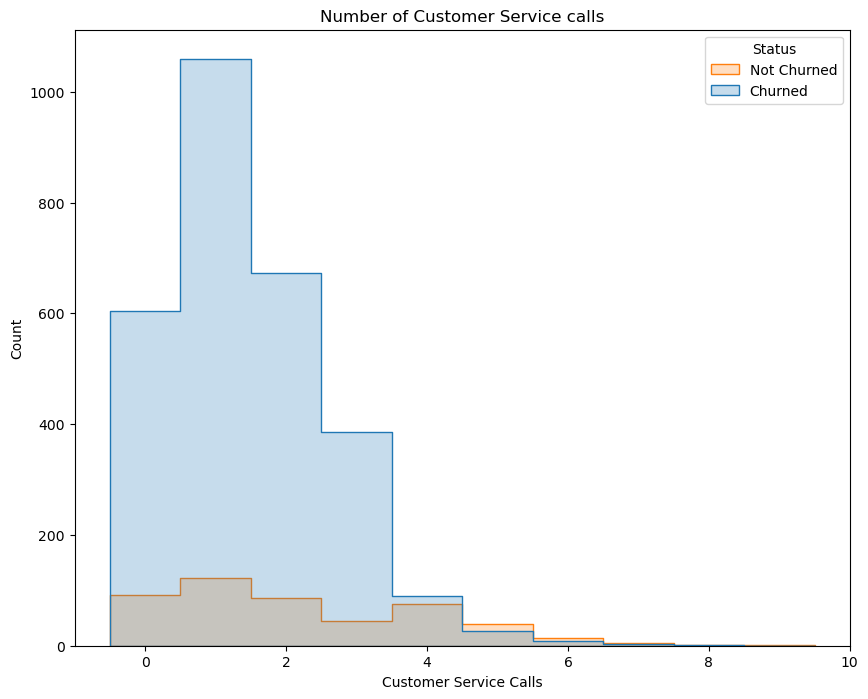

In [150]:

fig, ax = plt.subplots(figsize=(10, 8))

bins = np.arange(11) - 0.5

ax = sns.histplot(
    df,
    x='customer service calls',
    hue='churn',
    multiple='layer',
    bins=bins,
    element='step'  
)

ax.set_title('Number of Customer Service calls')
ax.set_xlabel("Customer Service Calls")
ax.set_ylabel("Count")
plt.yticks()
plt.xticks()
plt.xlim()

ax.legend(title="Status", labels=["Not Churned", 'Churned'])
plt.show()

* A clear correlation appears to exist between churn values and customer support calls. Customers are far more likely to stop using their service after four calls.


Correlation matrix

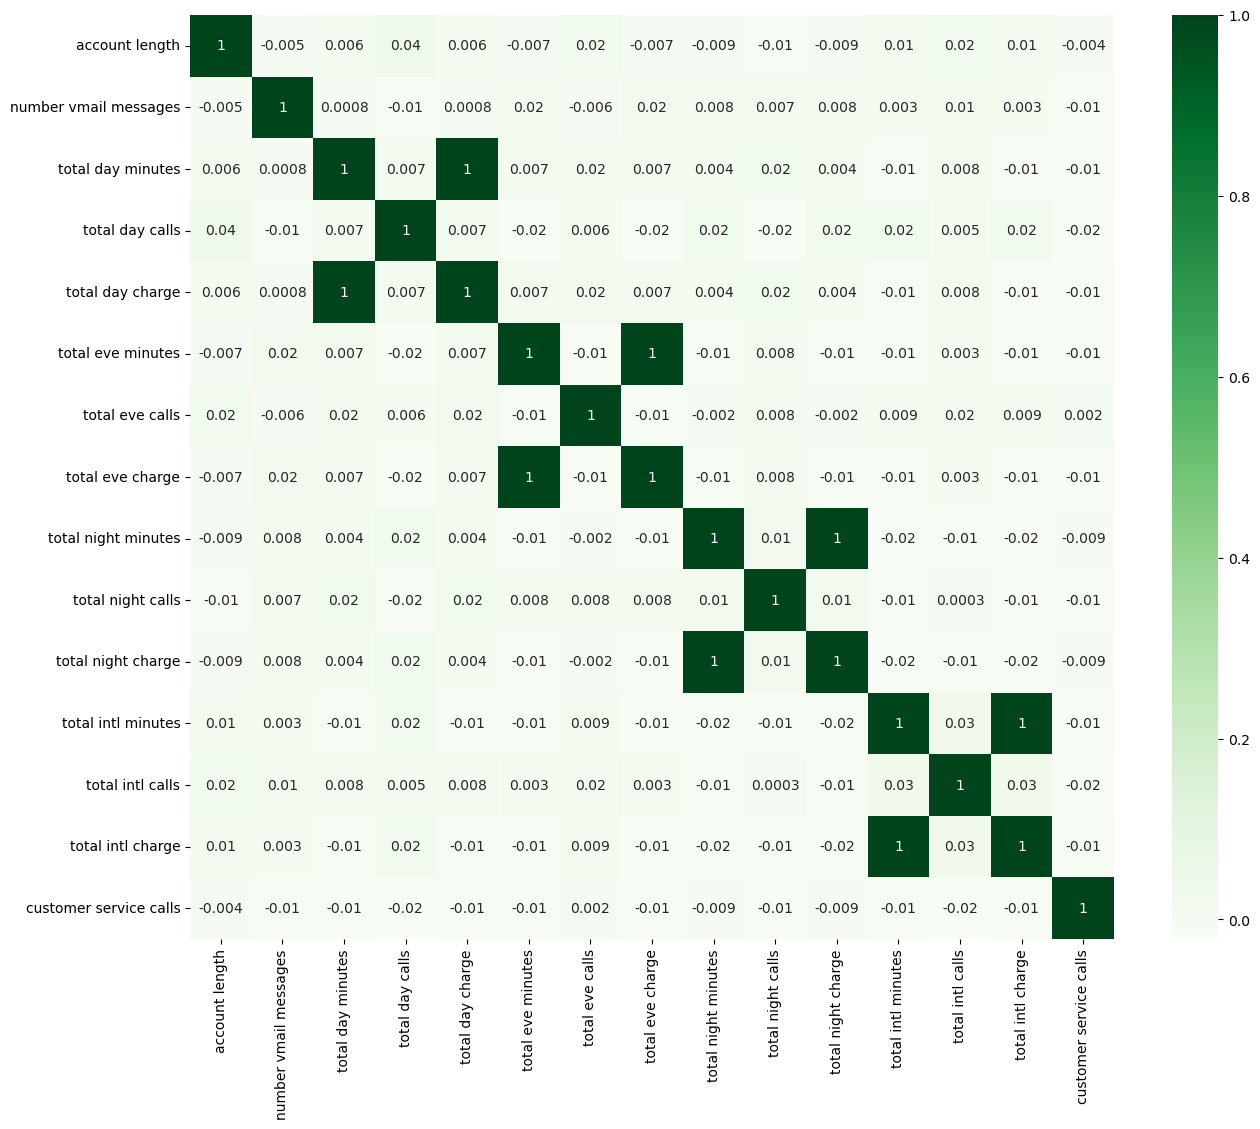

In [151]:
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Greens', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

* While certain features share a perfect correlation, the majority of the features do not. 
    * There is a full positive correlation between the features of total day charge and total day minutes; there is a full positive correlation between the features of total eve charge and total eve minutes; there is a full positive correlation between the features of total night charge and total night minutes; and there is a full positive correlation between the features of total int charge and total int minutes.
    * The charge is a direct result of the minutes consumed, so it makes natural that these features would be exactly connected. Perfect multicollinearity is indicated by a perfect correlation of 1.


## Categorical Feature Analysis

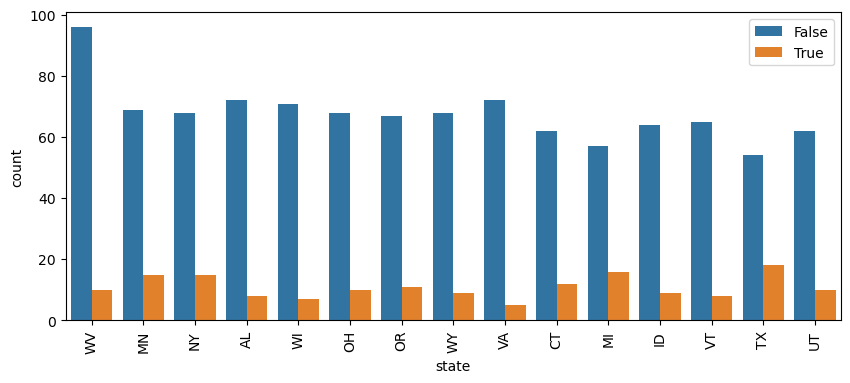

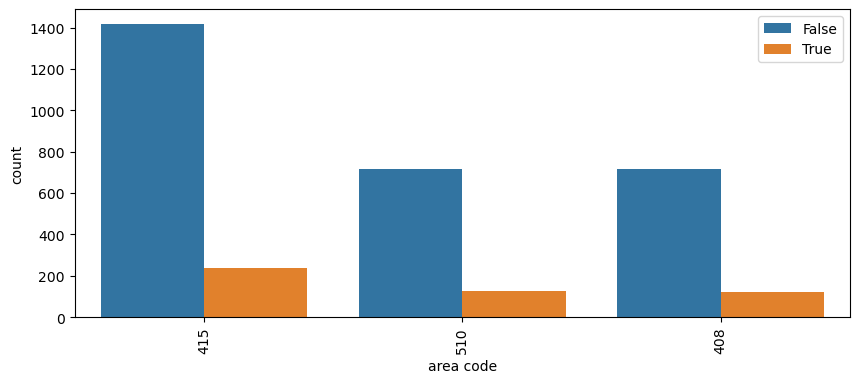

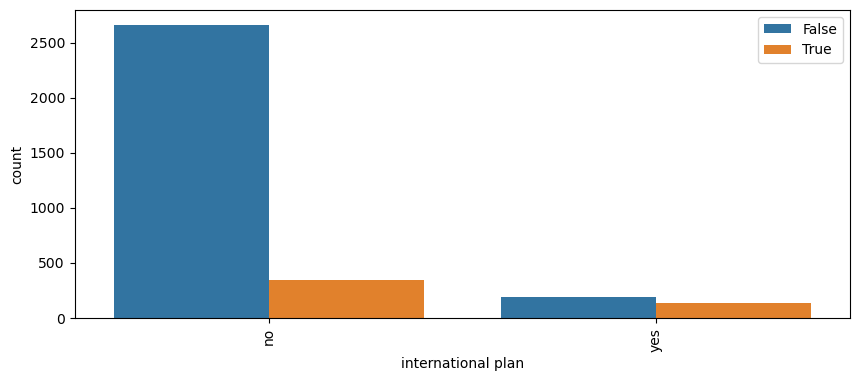

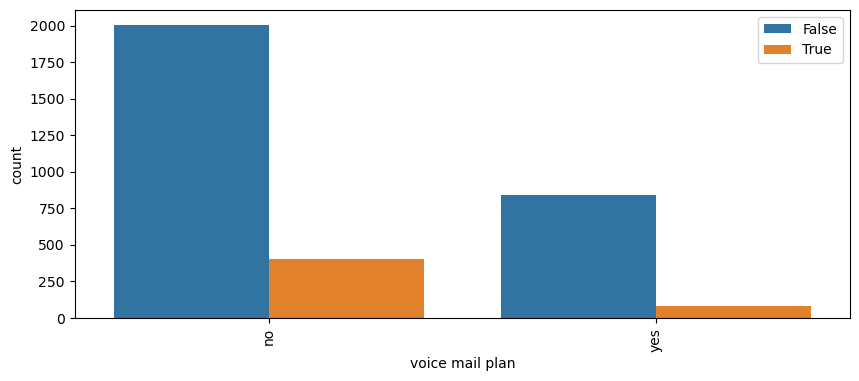

In [152]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

## Modeling

#### One Hot Encoding

Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

Transforming "Churn" Feature's Rows into 0s and 1s

In [153]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [154]:
ip, vmp = df['international plan'].map({'yes': 1, 'no': 0}), df['voice mail plan'].map({'yes': 1, 'no': 0})

df['international plan'], df['voice mail plan'] = ip, vmp
df['churn'] = df['churn'].astype('int')

df_new = pd.get_dummies(data=df, columns=['state', 'area code'])
df_new.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


#### Scaling the data

 Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.

In [155]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_new[columns].values.reshape(-1,1))

for i in df_new.select_dtypes(include=[np.number]).columns:
    df_new[i] = scaling(i)
df_new.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,0.524793,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.438017,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.561983,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.342975,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.305785,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Train-Test Split
Splitting the dataset into training 75% and testing 25%.

In [156]:
#splits our data set to features and the target "churn"
X = df_new.drop(["churn"], axis = 1)
y= df_new["churn"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [157]:
# organize columns for the pipeline
num_cols = []
ohe_cols = []

for c in X_train.columns:
    if X_train[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    else:
        ohe_cols.append(c)
        
print(num_cols)
print(ohe_cols)

['account length', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_408', 'area code_

In [158]:
nums = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
    ])

#Takes all categorical variables and OneHotEncodes them
ohe = Pipeline(steps=[
    ("ohe_encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

In [159]:
#builds our preprocessor step using a ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", nums, num_cols),
        ("ohe", ohe, ohe_cols)
    ])
preprocess.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['account length', 'international plan',
                                  'voice mail plan', 'number vmail messages',
                                  'total day minutes', 'total day calls',
                                  'total day charge', 'total eve minutes',
                                  'total eve calls', 'total eve charge',
                                  'total night minutes', 'total night calls',
                                  'total night charge', 'total intl minutes',
                                  'total intl calls', 'total intl charge',
                                  'customer service calls', 'state_AK',
                                  'state_AL', 'state_AR', 'state_AZ',
                                  'state_CA', 'state_CO', 'state_CT',
                                  'state_DC', 'state_DE', 'state_FL',
                                  'state_GA', 'state_HI', 'state_IA', ...]),
                                ('ohe',
                                 Pipeline(steps=[('ohe_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

## Model 1 - Logistic Regression Classifier 
* Logistic regression is applied when the target variable's value is categorical in nature. 
* It is most frequently utilised when the data in question has binary output, meaning that it either belongs to a class or is a 0 or a 1. 
* Baseline model will be created using this method.


In [168]:
# fiting data and getting predictions
logreg = lr= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) 


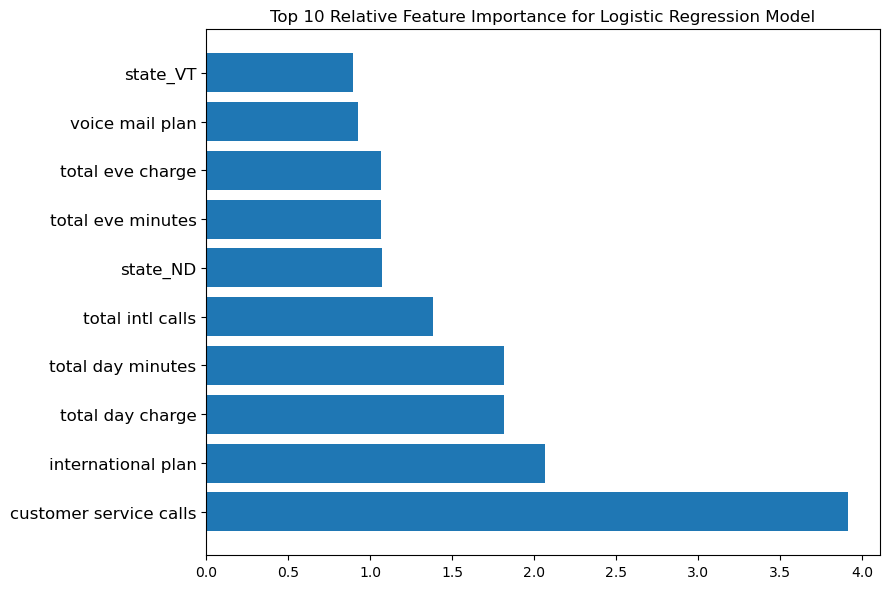

In [171]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
sorted_idx = np.argsort(feature_importance)[::-1][:10]

plt.figure(figsize=(9, 6))
plt.barh(range(10), feature_importance[sorted_idx], align='center')
plt.title('Top 10 Relative Feature Importance for Logistic Regression Model')
plt.yticks(range(10), np.array(X.columns)[sorted_idx], fontsize=12)
plt.tight_layout()
plt.show()


In [173]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       709
           1       0.57      0.19      0.29       125

    accuracy                           0.86       834
   macro avg       0.72      0.58      0.60       834
weighted avg       0.83      0.86      0.83       834



**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.85731
F1 score for testing set:  0.28743
Recall score for testing set:  0.192
Precision score for testing set:  0.57143


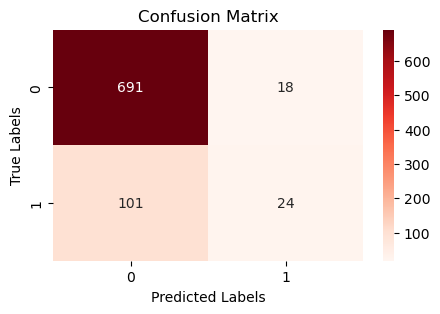

In [189]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the logistic regression classifier model, customer service calls,iInternational plan and total day charge are the top three important features.
* Model accuracy is 85.7%, which isn't bad. F1 score is only 28.27% which means the test will only be accurate less than half the times it is ran. 

### Model 2 - Random Forest Classifier
A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is.

In [180]:
#Object creation, fitting the data & getting predictions 
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train,y_train) 
y_pred_rf = rf_model_final.predict(X_test)

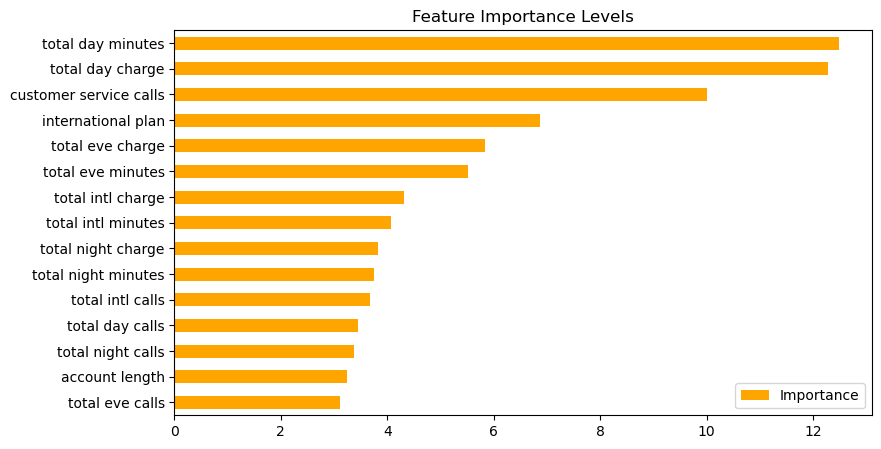

In [181]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "orange",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [182]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       709
           1       0.99      0.61      0.75       125

    accuracy                           0.94       834
   macro avg       0.96      0.80      0.86       834
weighted avg       0.94      0.94      0.93       834



**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.94005
F1 score for testing set:  0.75248
Recall score for testing set:  0.608
Precision score for testing set:  0.98701


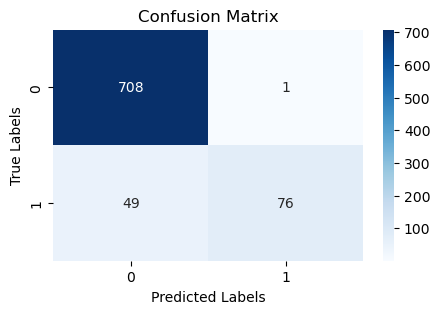

In [187]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the random forest classifier, total day minutes, total day charge and customer service calls features have the highest impact on the model. 
* Accuracy and F1 score are much higher for this model, which is good news.

### Model 3 - Decision Tree Classifier
* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [190]:
# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)

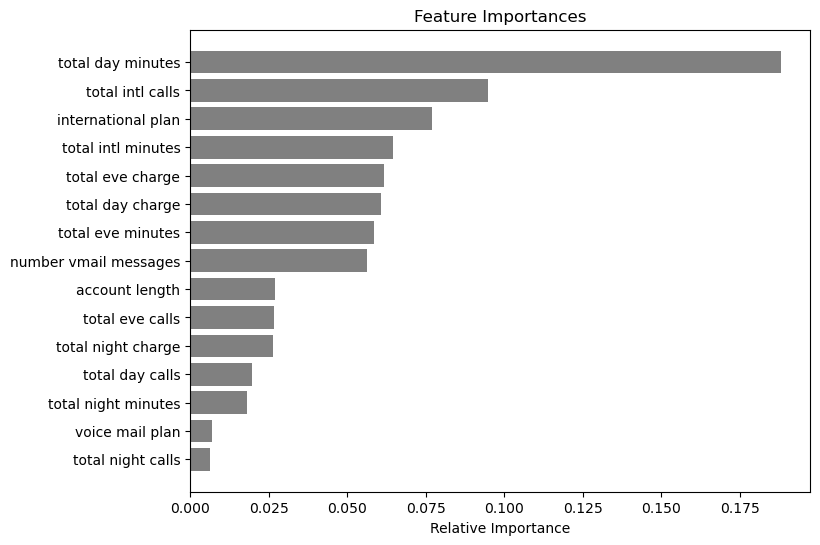

In [191]:
#feature importance
feature_names = list(X_train.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [192]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       709
           1       0.72      0.74      0.73       125

    accuracy                           0.92       834
   macro avg       0.83      0.85      0.84       834
weighted avg       0.92      0.92      0.92       834



**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.91727
F1 score for testing set:  0.72941
Recall score for testing set:  0.744
Precision score for testing set:  0.71538


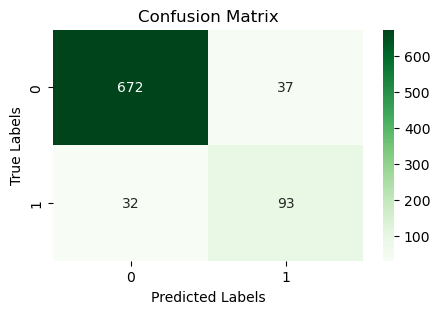

In [193]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the decision tree classifier, total day minutes, total international calls and international plan are the three most important for the model.
* The accuracy and F1 score for this model is better than model 1 but worse than model 2.

Comparing models

ROC CURVE


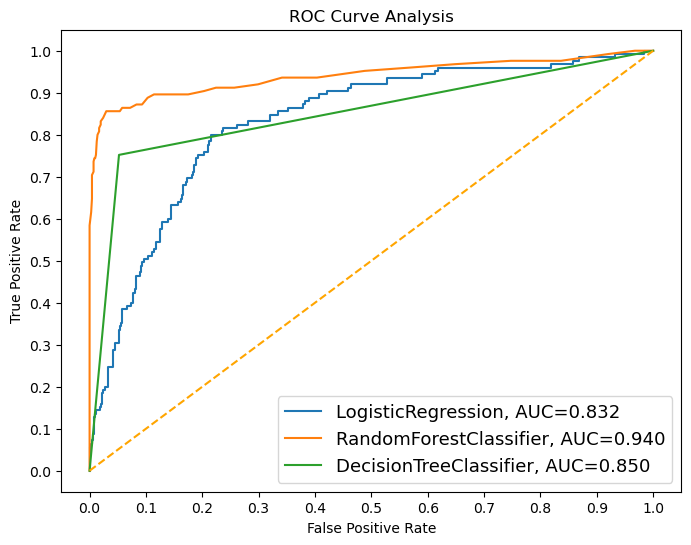

In [201]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate")

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate")

plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* The ROC curve illustrates the true positive rate against the false positive rate of our classifier.
* The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case. 

### Hyperparameter Tuning of Random Forest Classifier
* 3-Fold Cross validated GridSearchCV hyperparameter tuning technique is used.

In [202]:
rf_params = {"max_depth": [8,15,20],
             "n_estimators":[500,1000],
             "min_samples_split":[5,10,15],
             "criterion":['entropy','gini']}

In [205]:
rf_model2 = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model2,rf_params,cv=3,n_jobs=-1,verbose=False)
rf_cv_model.fit(X_train,y_train)
print("Best parameters:"+str(rf_cv_model.best_params_))


Best parameters:{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}


In [206]:
rf_model_final = RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=500,criterion='entropy')
rf_model_final.fit(X_train,y_train)
y_pred_final = rf_model_final.predict(X_test)

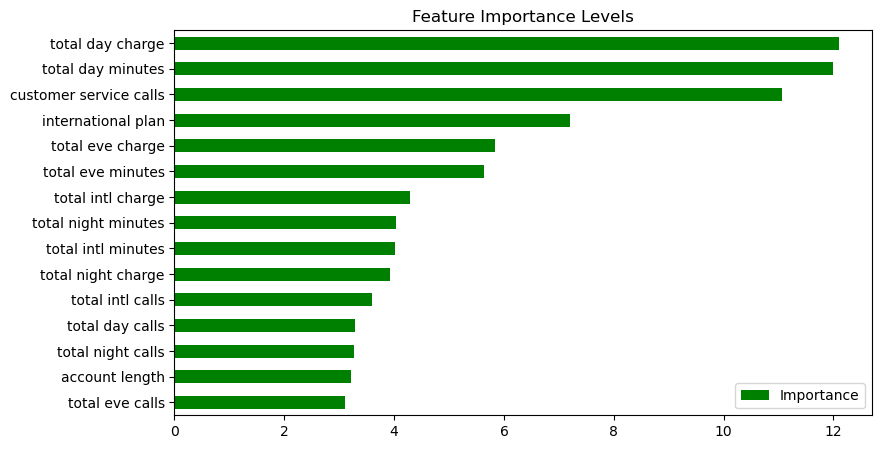

In [207]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "green",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [208]:
print(classification_report(y_test, y_pred_final, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       709
           1       1.00      0.56      0.72       125

    accuracy                           0.93       834
   macro avg       0.96      0.78      0.84       834
weighted avg       0.94      0.93      0.93       834



**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ****************
Accuracy score for testing set:  0.93405
F1 score for testing set:  0.71795
Recall score for testing set:  0.56
Precision score for testing set:  1.0


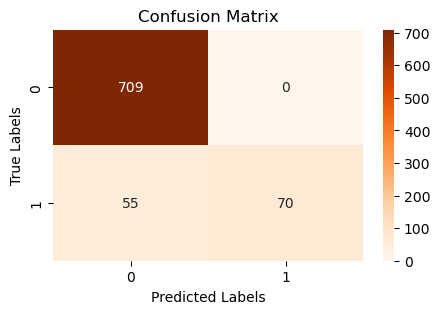

In [209]:
print("**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ****************")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_final),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_final),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_final),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_final),5))
cm_rf = confusion_matrix(y_test, y_pred_final)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

## Evaluation

In [210]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train , y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       709
         1.0       1.00      0.59      0.74       125

    accuracy                           0.94       834
   macro avg       0.97      0.80      0.85       834
weighted avg       0.94      0.94      0.93       834



## Result Interpretation

Precision — What percent of your predictions were correct?
Based on the above findings, the model accurately predicts that one will discontinue utilizing the company's services 93% of the time.

Recall captures What percent of the positive cases the model predicts. This model captures 100% of the positive cases.

F1 score  answers the question of what percent of positive predictions were correct? On this, the model captures ~97% of correct positive predictions.

Accuracy, as its name implies, takes into account the model's overall accuracy, however this is only true when the model is balanced. This model balances for the situation at hand, accurately projecting the outcomes 94% of the time.
